In [1]:
import numpy as np
from scipy import stats
from scipy.optimize import minimize
import matplotlib.pyplot as plt

In [2]:
plt.rcParams['figure.figsize'] = [10, 8]

In [3]:
np.random.seed(123456789)
θ = 0.85
m = 20
D = np.random.binomial(1, θ, m)

### __MLE__

In [4]:
θ_mle = np.mean(D)

In [5]:
θ_mle

0.95

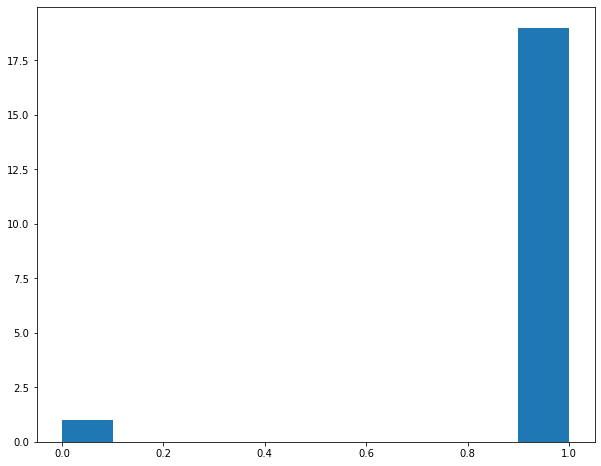

In [6]:
plt.hist(D);
plt.show()

### __MAP with a Flat Prior__

In [7]:
def plot_beta(a=1, b=1):
    x = np.linspace(0, 1, 1_000)
    y = stats.beta.pdf(x, a, b)
    plt.plot(x, y, lw=2.0, color='darkblue', alpha=0.5)
    plt.fill_between(x, y, facecolor='orange', alpha=0.5)
    plt.title(f"Beta({a},{b}) Distribution")
    plt.show()

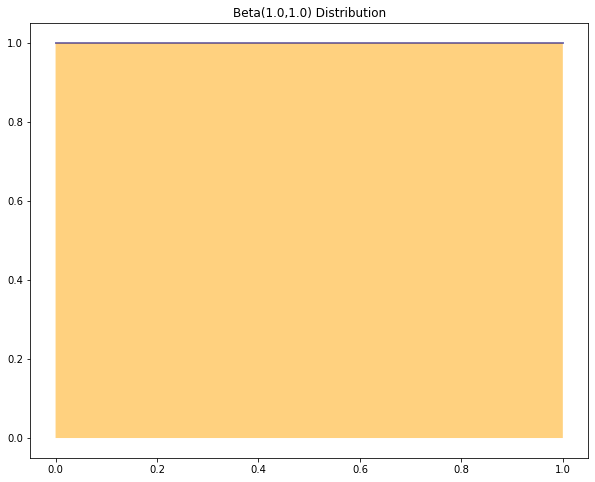

In [8]:
## Use a "flat" (uninformative) prior
a_prior = 1.0
b_prior = 1.0
plot_beta(a_prior, b_prior)

In [9]:
## Conjugate model will be Beta(a*, b*) via Bayes' Rule
N1 = np.sum(D)
N0 = m - N1
a_post = a_prior + N1
b_post = b_prior + N0
a_post, b_post

(20.0, 2.0)

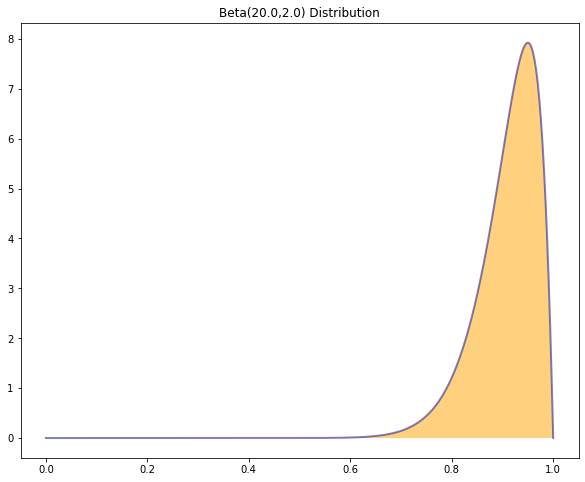

In [10]:
plot_beta(a_post, b_post)

In [11]:
θ_map = (a_post - 1.0) / (a_post + b_post - 2.0)
θ_map

0.95

### __MAP with an Informative Prior__

In [12]:
α = 85
β = 15

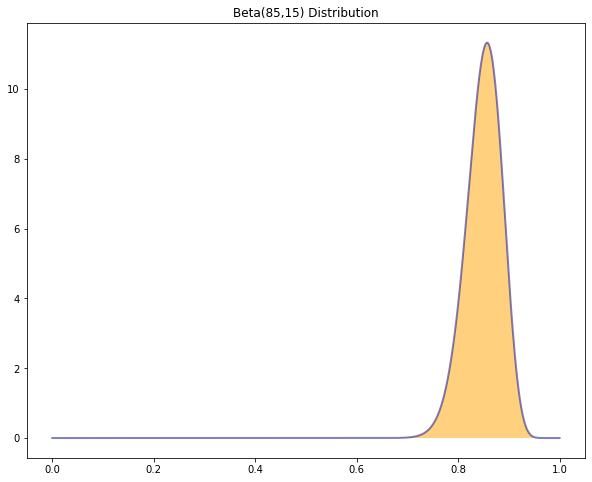

In [13]:
plot_beta(α, β)

In [14]:
α_post = α + N1
β_post = β + N0

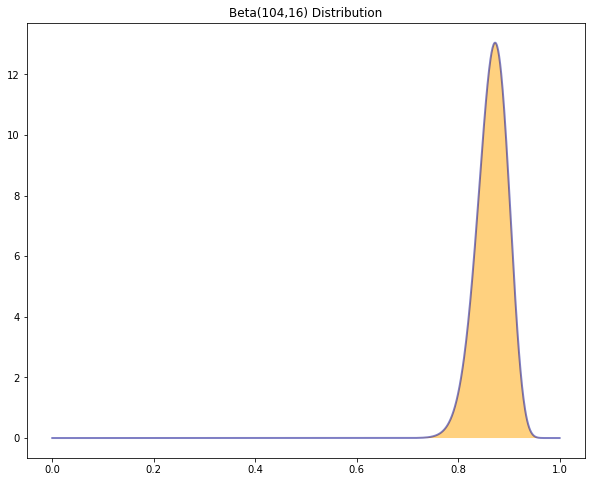

In [15]:
plot_beta(α_post, β_post)

In [16]:
θ_map_inf = (α_post - 1.0) / (α_post + β_post - 2.0)
θ_map_inf

0.8728813559322034